# 2조

# 데이터 SET 
### 교통사고분석시스템의 자전거 사고 데이터

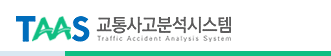

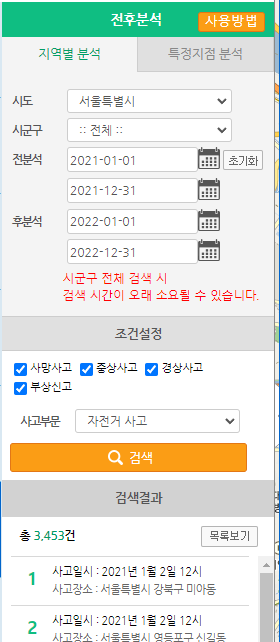 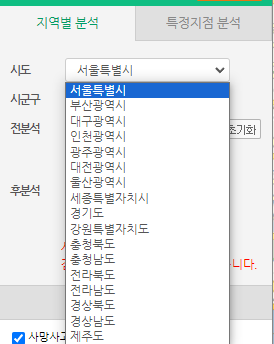

# 데이터 형태

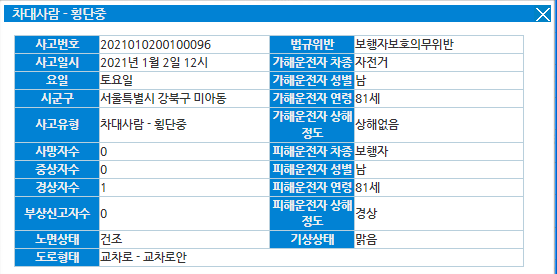

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Replace 'your_folder_path' with the path to your folder containing CSV files
folder_path = 'data/20-22'
# Replace 'output_combined.csv' with the desired name for your combined CSV file
output_file = 'output_combined.csv'
# Get all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

combined_data = pd.DataFrame()

for csv_file in csv_files:
    df = pd.read_csv(csv_file,  encoding='cp949')
    combined_data = pd.concat([combined_data, df], ignore_index=True)

# Save the combined data to a new CSV file
combined_data.to_csv(output_file, index=False)

In [2]:
df = pd.read_csv('data/output_combined.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32632 entries, 0 to 32631
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        32632 non-null  int64 
 1   사고일시        32632 non-null  object
 2   요일          32632 non-null  object
 3   시군구         32632 non-null  object
 4   사고내용        32632 non-null  object
 5   사망자수        32632 non-null  int64 
 6   중상자수        32632 non-null  int64 
 7   경상자수        32632 non-null  int64 
 8   부상신고자수      32632 non-null  int64 
 9   사고유형        32632 non-null  object
 10  법규위반        32632 non-null  object
 11  노면상태        32632 non-null  object
 12  기상상태        32632 non-null  object
 13  도로형태        32632 non-null  object
 14  가해운전자 차종    32632 non-null  object
 15  가해운전자 성별    32632 non-null  object
 16  가해운전자 연령    32632 non-null  object
 17  가해운전자 상해정도  32632 non-null  object
 18  피해운전자 차종    31198 non-null  object
 19  피해운전자 성별    31198 non-null  object
 20  피해운전자 

In [7]:
df.isna().sum()

사고번호             0
사고일시             0
요일               0
시군구              0
사고내용             0
사망자수             0
중상자수             0
경상자수             0
부상신고자수           0
사고유형             0
법규위반             0
노면상태             0
기상상태             0
도로형태             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종      1434
피해운전자 성별      1434
피해운전자 연령      1434
피해운전자 상해정도    1434
dtype: int64

In [5]:
df.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2020010200100362,2020년 1월 2일 17시,목요일,경상북도 포항시 북구 죽도동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,자전거,남,70세,경상,승용,여,50세,상해없음
1,2020010800100465,2020년 1월 8일 18시,수요일,경상북도 경주시 안강읍,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,자전거,남,20세,중상,승용,여,42세,상해없음
2,2020011000100216,2020년 1월 10일 11시,금요일,경상북도 안동시 운흥동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로부근,자전거,남,75세,경상,승용,남,81세,상해없음
3,2020011100100222,2020년 1월 11일 12시,토요일,경상북도 안동시 북문동,부상신고사고,0,0,0,1,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,자전거,남,76세,부상신고,승용,남,75세,상해없음
4,2020011300100133,2020년 1월 13일 10시,월요일,경상북도 경산시 중방동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,자전거,여,61세,경상,화물,남,29세,상해없음


In [ ]:
df.dropna(inplace=True)
df.info()

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"칼럼 '{column}'의 유니크한 값: {unique_values}")
    print()

칼럼 '사고번호'의 유니크한 값: [2020010200100362 2020010800100465 2020011000100216 ... 2019122100100277
 2019122500100354 2019123000100415]

칼럼 '사고일시'의 유니크한 값: ['2020년 1월 2일 17시' '2020년 1월 8일 18시' '2020년 1월 10일 11시' ...
 '2019년 12월 10일 06시' '2019년 12월 14일 12시' '2019년 12월 25일 18시']

칼럼 '요일'의 유니크한 값: ['목요일' '수요일' '금요일' '토요일' '월요일' '화요일' '일요일']

칼럼 '시군구'의 유니크한 값: ['경상북도 포항시 북구 죽도동' '경상북도 경주시 안강읍' '경상북도 안동시 운흥동' ... '대전광역시 유성구 계산동'
 '대전광역시 유성구 용계동' '대전광역시 동구 신하동']

칼럼 '사고내용'의 유니크한 값: ['경상사고' '중상사고' '부상신고사고' '사망사고']

칼럼 '사망자수'의 유니크한 값: [0 1]

칼럼 '중상자수'의 유니크한 값: [0 1 2 3]

칼럼 '경상자수'의 유니크한 값: [ 1  0  2  4  3  5  7  6 10]

칼럼 '부상신고자수'의 유니크한 값: [0 1 2 3 4 6 5]

칼럼 '사고유형'의 유니크한 값: ['차대차 - 측면충돌' '차대차 - 정면충돌' '차대차 - 기타' '차량단독 - 전도전복 - 전도' '차대사람 - 차도통행중'
 '차대차 - 추돌' '차대사람 - 길가장자리구역통행중' '차량단독 - 도로외이탈 - 추락' '차대사람 - 기타'
 '차량단독 - 기타' '차대사람 - 보도통행중' '차대사람 - 횡단중' '차량단독 - 공작물충돌'
 '차량단독 - 도로외이탈 - 기타' '차량단독 - 전도전복' '차량단독 - 주/정차차량 충돌' '차대차 - 후진중충돌'
 '차량단독 - 전도전복 - 전복' '철길건널목 - 철길건널목']

칼럼 '법규위반'의 유니크한 값: ['교차로운행방법위반' '안

In [8]:
value_to_drop = ['미분류', '기타불명']
column_to_check = ['가해운전자 연령','피해운전자 연령','피해운전자 차종','피해운전자 성별', '가해운전자 성별']

# Create a boolean mask for rows with the specified value in the specified column
mask = df[column_to_check].isin(value_to_drop).any(axis=1)

# Drop rows based on the mask
df = df[~mask]

# If you want to reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [ ]:
df['가해운전자 연령'] = df['가해운전자 연령'].str.extract('(\d+)').astype(int)
df['피해운전자 연령'] = df['피해운전자 연령'].str.extract('(\d+)').astype(int)

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"칼럼 '{column}'의 유니크한 값: {unique_values}")
    print()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31806 entries, 0 to 31805
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        31806 non-null  int64 
 1   사고일시        31806 non-null  object
 2   요일          31806 non-null  object
 3   시군구         31806 non-null  object
 4   사고내용        31806 non-null  object
 5   사망자수        31806 non-null  int64 
 6   중상자수        31806 non-null  int64 
 7   경상자수        31806 non-null  int64 
 8   부상신고자수      31806 non-null  int64 
 9   사고유형        31806 non-null  object
 10  법규위반        31806 non-null  object
 11  노면상태        31806 non-null  object
 12  기상상태        31806 non-null  object
 13  도로형태        31806 non-null  object
 14  가해운전자 차종    31806 non-null  object
 15  가해운전자 성별    31806 non-null  object
 16  가해운전자 연령    31806 non-null  object
 17  가해운전자 상해정도  31806 non-null  object
 18  피해운전자 차종    30373 non-null  object
 19  피해운전자 성별    30373 non-null  object
 20  피해운전자 

In [ ]:
df.to_csv('jung.csv', index=False)

In [ ]:
# df['사망자수'].value_counts(normalize=True)

# 여기부터 시작입니다 시각화 시작하시면 됩니다.


# 교통사고 인적피해의 구분 
[출처](https://taas.koroad.or.kr/sta/acs/exs/wordArngPopup.do)

- "사망" 이란 교통사고 발생시로부터 30일이내에 사망한 경우. (99년까지는 72시간 이내)
- "중상" 이란 교통사고로 인하여 3주 이상의 치료를 요하는 부상을 입은 경우.
- "경상" 이란 교통사고로 인하여 5일 이상 3주 미만의 치료를 요하는 부상을 입은 경우.
- "부상신고" 란 교통사고로 인하여 5일 미만의 치료를 요하는 부상을 입은 경우.

In [28]:
df = pd.read_csv('data/jung.csv')

In [29]:
df["사고시"] = df["사고일시"].str.split(" ").str.get(3)
df['사고시'] = df['사고시'].str.extract('(\d+)').astype(int)

bins = [0, 6, 12, 18, 24]
labels = ['dawn', 'morn', 'aftern', 'night']

df['하루시간구분'] = pd.cut(df['사고시'], bins=bins, labels=labels, right=False)
df['하루시간구분'] = df['하루시간구분'].astype('object')
df['하루시간구분'].value_counts()

하루시간구분
aftern    12739
morn       8849
night      7750
dawn       1035
Name: count, dtype: int64

In [30]:
df['월'] = df['사고일시'].str.extract('(\d+)월').astype(str)


In [31]:
df["도광역시"] = df["시군구"].str.split(" ").str.get(0)

In [16]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"칼럼 '{column}'의 유니크한 값: {unique_values}")
    print()

칼럼 '사고번호'의 유니크한 값: [2020010200100362 2020010800100465 2020011000100216 ... 2019121400100366
 2019122100100277 2019123000100415]

칼럼 '사고일시'의 유니크한 값: ['2020년 1월 2일 17시' '2020년 1월 8일 18시' '2020년 1월 10일 11시' ...
 '2019년 12월 7일 13시' '2019년 12월 10일 06시' '2019년 12월 14일 12시']

칼럼 '요일'의 유니크한 값: ['목요일' '수요일' '금요일' '토요일' '월요일' '화요일' '일요일']

칼럼 '시군구'의 유니크한 값: ['경상북도 포항시 북구 죽도동' '경상북도 경주시 안강읍' '경상북도 안동시 운흥동' ... '대전광역시 유성구 계산동'
 '대전광역시 유성구 용계동' '대전광역시 동구 신하동']

칼럼 '사고내용'의 유니크한 값: ['경상사고' '중상사고' '부상신고사고' '사망사고']

칼럼 '사망자수'의 유니크한 값: [0 1]

칼럼 '중상자수'의 유니크한 값: [0 1 2 3]

칼럼 '경상자수'의 유니크한 값: [ 1  0  2  4  3  5  7  6 10]

칼럼 '부상신고자수'의 유니크한 값: [0 1 2 3 4 6 5]

칼럼 '사고유형'의 유니크한 값: ['차대차 - 측면충돌' '차대차 - 정면충돌' '차대차 - 기타' '차대사람 - 차도통행중' '차대차 - 추돌'
 '차대사람 - 길가장자리구역통행중' '차대사람 - 기타' '차대사람 - 보도통행중' '차대사람 - 횡단중' '차대차 - 후진중충돌']

칼럼 '법규위반'의 유니크한 값: ['교차로운행방법위반' '안전운전불이행' '중앙선침범' '신호위반' '차로위반' '직진우회전진행방해' '안전거리미확보' '기타'
 '보행자보호의무위반' '불법유턴']

칼럼 '노면상태'의 유니크한 값: ['건조' '젖음/습기' '기타' '적설' '서리/결빙' '침수']

칼럼 '기상상태'의 유니크한 값: ['

In [32]:
import matplotlib
print(matplotlib.matplotlib_fname())
print(plt.rcParams['font.family'])

c:\Users\user\miniconda3\envs\venv\lib\site-packages\matplotlib\mpl-data\matplotlibrc
['NanumGothic']


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30373 entries, 0 to 30372
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        30373 non-null  int64 
 1   사고일시        30373 non-null  object
 2   요일          30373 non-null  object
 3   시군구         30373 non-null  object
 4   사고내용        30373 non-null  object
 5   사망자수        30373 non-null  int64 
 6   중상자수        30373 non-null  int64 
 7   경상자수        30373 non-null  int64 
 8   부상신고자수      30373 non-null  int64 
 9   사고유형        30373 non-null  object
 10  법규위반        30373 non-null  object
 11  노면상태        30373 non-null  object
 12  기상상태        30373 non-null  object
 13  도로형태        30373 non-null  object
 14  가해운전자 차종    30373 non-null  object
 15  가해운전자 성별    30373 non-null  object
 16  가해운전자 연령    30373 non-null  int64 
 17  가해운전자 상해정도  30373 non-null  object
 18  피해운전자 차종    30373 non-null  object
 19  피해운전자 성별    30373 non-null  object
 20  피해운전자 

In [34]:
dele = ['사고일시','사고번호','시군구','사망자수','중상자수','경상자수','부상신고자수']
df.drop(columns=dele, inplace=True)


In [35]:
df['타겟'] = df['가해운전자 상해정도'].map({'경상': 1, '부상신고': 1, '기타불명': 0, '상해없음': 0, '사망': 2, '중상': 2})

In [36]:
df.drop('가해운전자 상해정도', inplace=True, axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30373 entries, 0 to 30372
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          30373 non-null  object
 1   사고내용        30373 non-null  object
 2   사고유형        30373 non-null  object
 3   법규위반        30373 non-null  object
 4   노면상태        30373 non-null  object
 5   기상상태        30373 non-null  object
 6   도로형태        30373 non-null  object
 7   가해운전자 차종    30373 non-null  object
 8   가해운전자 성별    30373 non-null  object
 9   가해운전자 연령    30373 non-null  int64 
 10  피해운전자 차종    30373 non-null  object
 11  피해운전자 성별    30373 non-null  object
 12  피해운전자 연령    30373 non-null  int64 
 13  피해운전자 상해정도  30373 non-null  object
 14  사고시         30373 non-null  int32 
 15  하루시간구분      30373 non-null  object
 16  월           30373 non-null  object
 17  도광역시        30373 non-null  object
 18  타겟          30373 non-null  int64 
dtypes: int32(1), int64(3), object(15)
memory usage

In [38]:
df['타겟'].value_counts()

타겟
1    16098
0     8820
2     5455
Name: count, dtype: int64

In [40]:

df = df[df['도광역시'] != '미분류']

df['도광역시'].value_counts()



도광역시
서울특별시      9665
경기도        7665
대구광역시      2361
경상북도       1563
경상남도       1349
부산광역시      1094
충청북도        948
전라남도        834
대전광역시       748
광주광역시       745
인천광역시       686
충청남도        658
전라북도        652
울산광역시       560
강원도         400
제주특별자치도     322
세종특별자치시     122
Name: count, dtype: int64

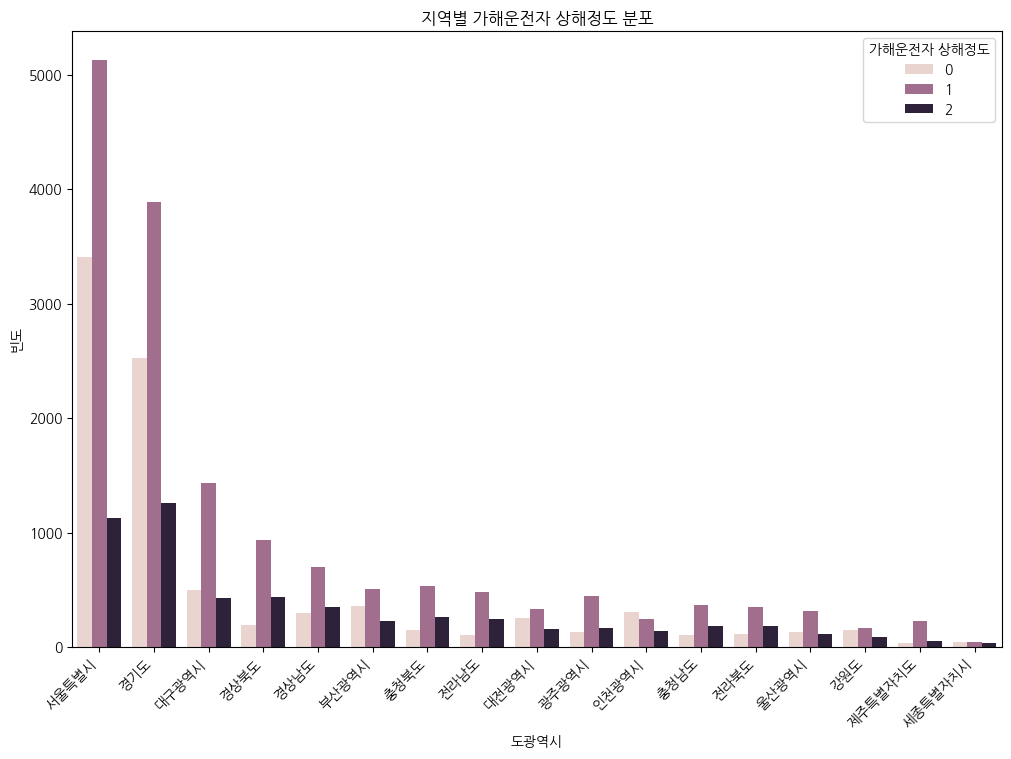

In [43]:
# figure 크기 설정
plt.figure(figsize=(12, 8))
# countplot 그리기
sns.countplot(x='도광역시', hue='타겟', data=df, order=df['도광역시'].value_counts().index)
# x축 레이블 회전 설정
plt.xticks(rotation=45, ha='right')  # rotation은 각도, ha는 정렬 방식을 나타냅니다.
# 그래프 타이틀 및 라벨 설정
plt.title('지역별 가해운전자 상해정도 분포')
plt.xlabel('도광역시')
plt.ylabel('빈도')
plt.legend(title='가해운전자 상해정도')
# 그래프 표시
plt.show()

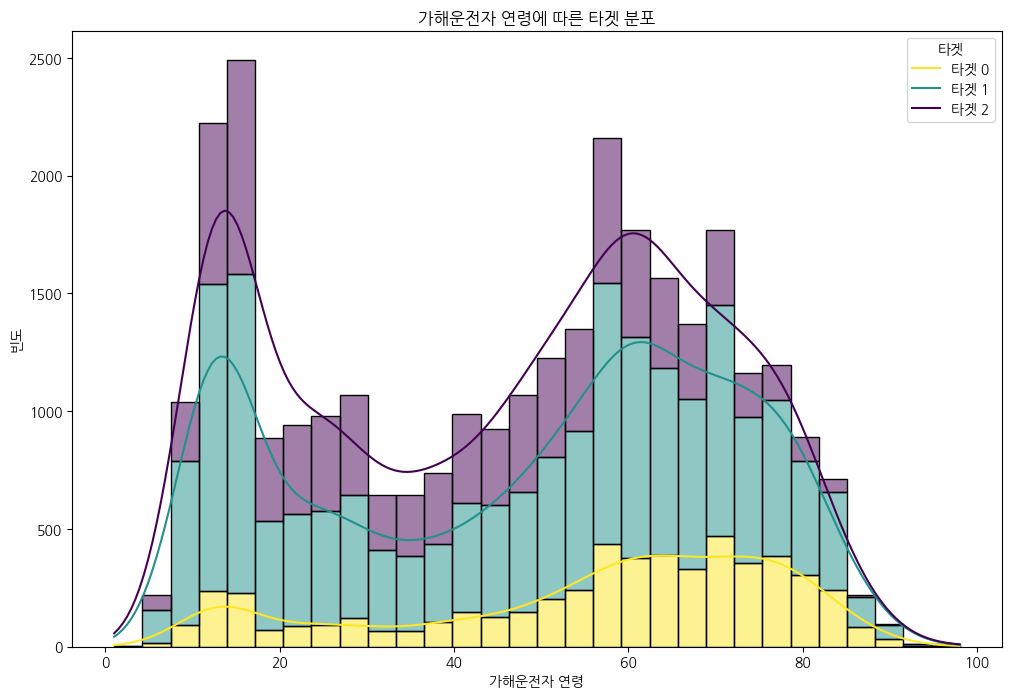

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# figure 크기 설정
plt.figure(figsize=(12, 8))

# '타겟' 값에 따른 피해운전자 연령 분포 시각화
sns.histplot(x='가해운전자 연령', hue='타겟', data=df, bins=30, kde=True, multiple="stack", palette='viridis')

# 그래프 타이틀 및 라벨 설정
plt.title('가해운전자 연령에 따른 타겟 분포')
plt.xlabel('가해운전자 연령')
plt.ylabel('빈도')

# 범례 위치 조정 및 타겟 값 설명 추가
plt.legend(title='타겟', loc='upper right', labels=['타겟 0', '타겟 1', '타겟 2'])

# 그래프 표시
plt.show()


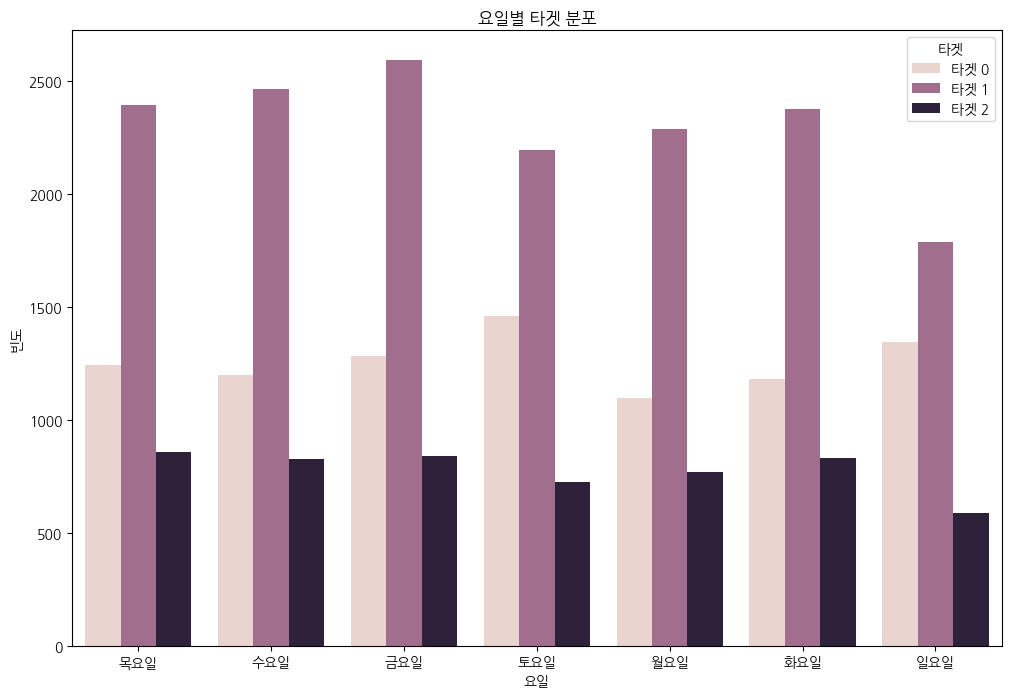

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(x='요일', hue='타겟', data=df)
plt.title('요일별 타겟 분포')
plt.xlabel('요일')
plt.ylabel('빈도')
plt.legend(title='타겟', labels=['타겟 0', '타겟 1', '타겟 2'])
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_22176\2194087868.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


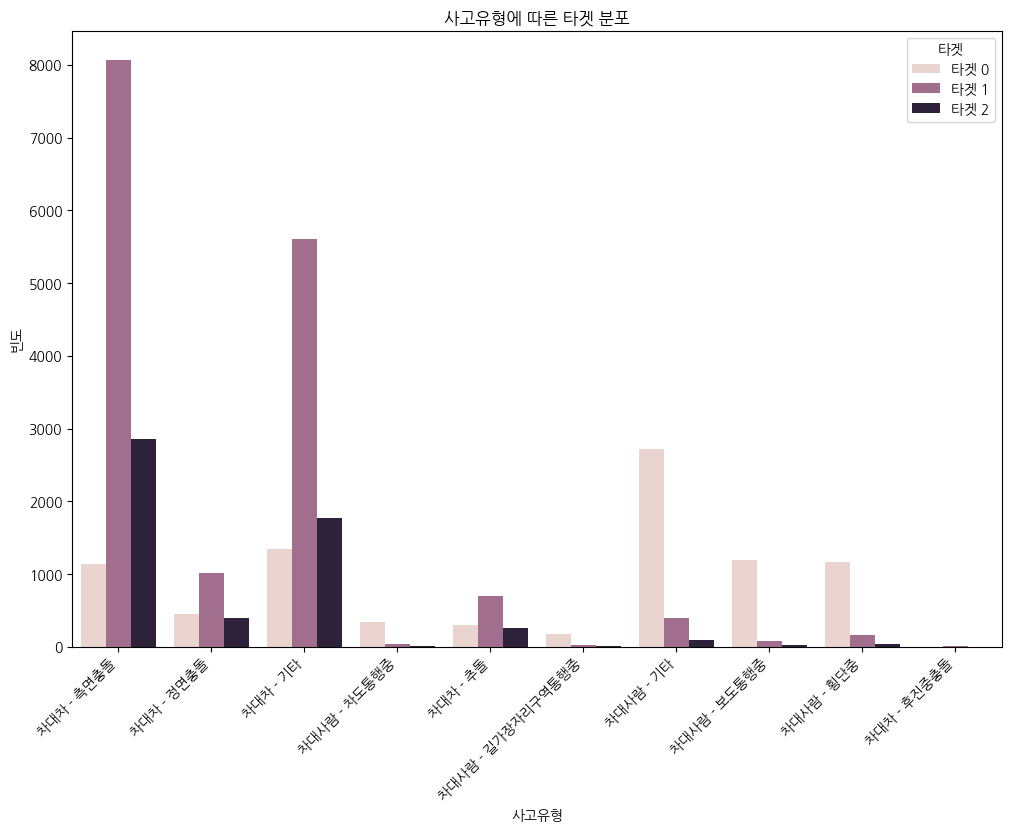

In [52]:

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='사고유형', hue='타겟', data=df)

# x축 레이블 기울이기
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('사고유형에 따른 타겟 분포')
plt.xlabel('사고유형')
plt.ylabel('빈도')
plt.legend(title='타겟', labels=['타겟 0', '타겟 1', '타겟 2'])
plt.show()


In [58]:
df = df[df['도로형태'] != '미분류 - 미분류']


C:\Users\user\AppData\Local\Temp\ipykernel_22176\263373196.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


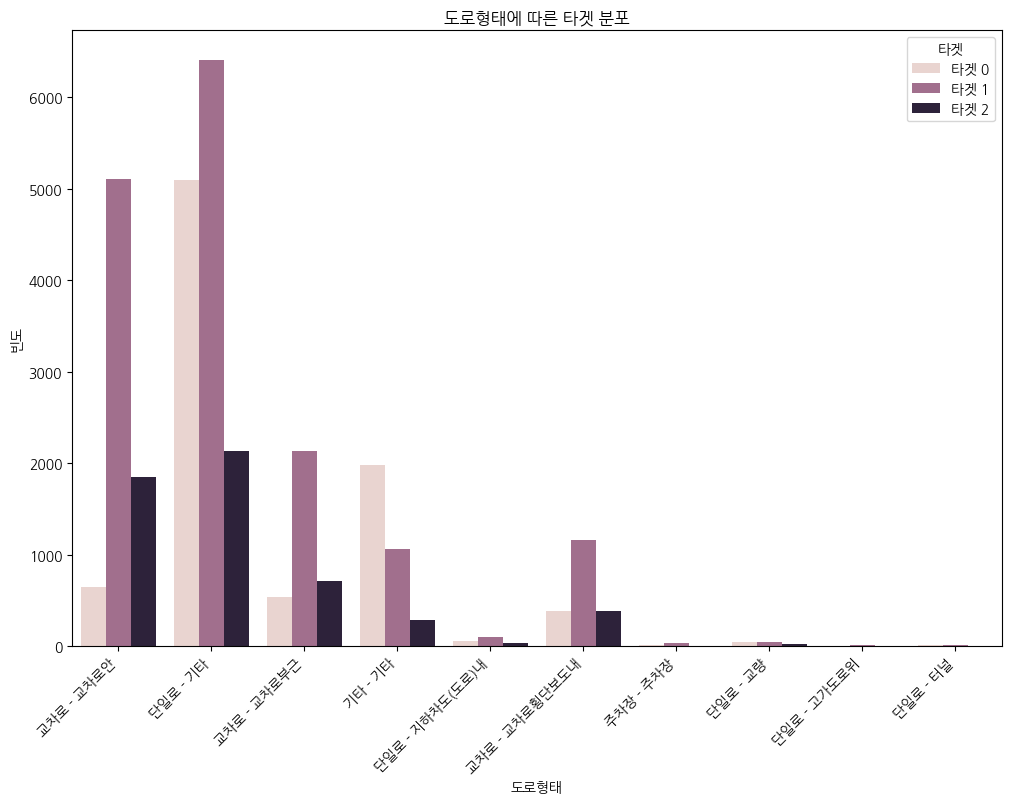

In [59]:

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='도로형태', hue='타겟', data=df)

# x축 레이블 기울이기
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('도로형태에 따른 타겟 분포')
plt.xlabel('도로형태')
plt.ylabel('빈도')
plt.legend(title='타겟', labels=['타겟 0', '타겟 1', '타겟 2'])
plt.show()


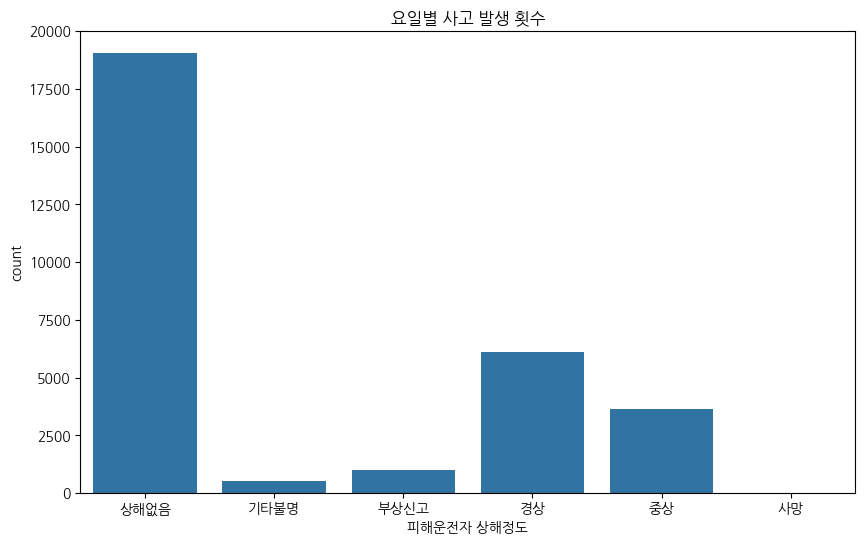

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='피해운전자 상해정도', data=df )
plt.title('요일별 사고 발생 횟수')
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
fatalities_df = df[df['피해운전자 상해정도'] == '사망']
fatalities_df.head()

In [ ]:
# 출력 옵션을 다시 기본값으로 설정
pd.reset_option('display.max_columns')

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='피해운전자 상해정도', data=df )
plt.title('요일별 사고 발생 횟수')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='사고시', data=df )
plt.title('요일별 사고 발생 횟수')
plt.show()

In [ ]:
df['가해운전자 상해정도'].value_counts()

In [ ]:
df['damage_level'] = df['가해운전자 상해정도'].map({'경상': 1, '부상신고': 1, '기타불명': 0, '상해없음': 0, '사망': 2, '중상': 2})

In [ ]:
df['damage_level'].value_counts()

# 널값

1. 가해운전자 성별
2. 가해운전 상해정도
3. 피해운전자 차종
4. 피해운전자 성별
5. 피해운전자 연령
6. 피해운전자 상해정도

In [ ]:
df['피해운전자 상해정도'].value_counts()

In [ ]:
df.isnull().sum()

In [ ]:
df[df.isnull().any(axis=1)]

In [ ]:
day_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
plt.figure(figsize=(10,6))
sns.countplot(x='요일',order=day_order, data=df )
plt.title('요일별 사고 발생 횟수')
plt.show()